### Project Description
Estimate the value of houses in Ames, Iowa, using 79 explanatory variables. The dataset is fairly small, with only 1460 training samples. The 79 features in the dataset are a mix of categorical and numerical features, and leave a lot of room for feature engineering.

This notebook merely preprocesses the data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# zo weghalen
data_training = pd.read_csv('data/train.csv')
data_training.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
3,460,528180130,120,RL,48.0,6472,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,248500
4,487,528290030,80,RL,61.0,9734,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,167000


In [16]:
# import data
data = pd.read_csv('data/test.csv')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,2127,907135180,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1,193,903206120,75,RL,NaN,7793,Pave,NaN,IR1,Bnk,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
2,2407,528181040,120,RL,40.0,6792,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2006,New,Partial
3,46,528175010,120,RL,44.0,6371,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,New,Partial
4,2478,531379030,60,RL,70.0,8304,Pave,NaN,IR1,Lvl,...,0,0,NaN,GdPrv,NaN,0,7,2006,WD,Normal


### OVERVIEW

There are multiple types of variables. Integers, floats, strings, NaN's. Use df.info() to gain detailed insight.


In [3]:
# display data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            733 non-null    int64  
 1   PID              733 non-null    int64  
 2   MS SubClass      733 non-null    int64  
 3   MS Zoning        733 non-null    object 
 4   Lot Frontage     605 non-null    float64
 5   Lot Area         733 non-null    int64  
 6   Street           733 non-null    object 
 7   Alley            55 non-null     object 
 8   Lot Shape        733 non-null    object 
 9   Land Contour     733 non-null    object 
 10  Utilities        733 non-null    object 
 11  Lot Config       733 non-null    object 
 12  Land Slope       733 non-null    object 
 13  Neighborhood     733 non-null    object 
 14  Condition 1      733 non-null    object 
 15  Condition 2      733 non-null    object 
 16  Bldg Type        733 non-null    object 
 17  House Style     

There are 2930 entries, numbered 0 to 2929, with **81 different features**. The **target feature** is 'SalePrice'. 

Out of all the columns there are several that have missing values. For instance, 'Alley', 'Pool QC', 'Fence', and 'Misc Feature'. These need to be fixed. 

### Cleaning the data

In [4]:
# remove irrelevant or uniquely identifying features
clean_data = data.drop(['Order', 'PID'], axis=1)
clean_data.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1,75,RL,NaN,7793,Pave,NaN,IR1,Bnk,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
2,120,RL,40.0,6792,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2006,New,Partial
3,120,RL,44.0,6371,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,New,Partial
4,60,RL,70.0,8304,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,NaN,0,7,2006,WD,Normal


In [5]:
# get overview of missing values
clean_data.isnull()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,False,False,False,False,False,True,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1,False,False,True,False,False,True,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,False,False,False,False,False,True,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
729,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
730,False,False,False,False,False,True,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
731,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


In [6]:
clean_data.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      128
Lot Area            0
Street              0
                 ... 
Misc Val            0
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
Length: 79, dtype: int64

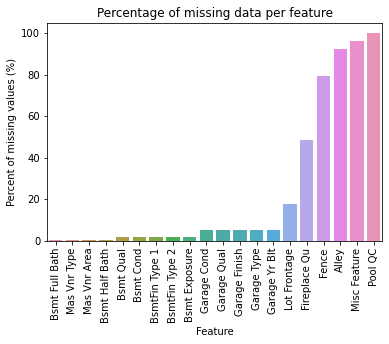

Bsmt Full Bath     0.136426
Mas Vnr Type       0.136426
Mas Vnr Area       0.136426
Bsmt Half Bath     0.136426
Bsmt Qual          1.773533
Bsmt Cond          1.773533
BsmtFin Type 1     1.773533
BsmtFin Type 2     1.773533
Bsmt Exposure      1.909959
Garage Cond        5.047749
Garage Qual        5.047749
Garage Finish      5.047749
Garage Type        5.047749
Garage Yr Blt      5.047749
Lot Frontage      17.462483
Fireplace Qu      48.567531
Fence             79.126876
Alley             92.496589
Misc Feature      96.452933
Pool QC           99.863574
dtype: float64

In [7]:
def missing_data(df):
    ''' Calculates and returns the percentage of missing data per feature. '''
    percentage = 100 * df.isnull().sum() / len(df)
    
    # sort in ascending order
    return percentage[percentage > 0].sort_values()

percent_missing_data = missing_data(clean_data)

sns.barplot(x = percent_missing_data.index, y = percent_missing_data)
plt.title('Percentage of missing data per feature')
plt.xlabel('Feature')
plt.ylabel('Percent of missing values (%)')
plt.xticks(rotation = 90)
plt.show()

percent_missing_data

### Chosing how to deal with missing values

There are the following options/steps:

1. Delete each row (sample) that contains a missing value
2. Delete the whole column (feature) containing the missing values
3. Replace the missing values with some other value

**Option 1**

Delete each row(sample) that contains a missing value.

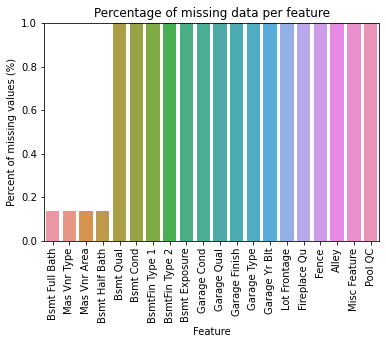

In [8]:
# check which rows to drop, depending on a treshold of 1%
sns.barplot(x = percent_missing_data.index, y = percent_missing_data)
plt.xticks(rotation = 90)

# zoom in on the threshold percentage of 1
plt.ylim(0 , 1)

# set labels
plt.title('Percentage of missing data per feature')
plt.xlabel('Feature')
plt.ylabel('Percent of missing values (%)')
plt.show()

In [9]:
# create list of the features were less than 1% of the values are missing
drop_rows = percent_missing_data[percent_missing_data <= 1]
drop_rows = drop_rows.index.tolist()

# remove the samples with missing values for each of those features 
clean_data = clean_data.dropna(axis = 'index', subset = drop_rows)
display(clean_data)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1,75,RL,NaN,7793,Pave,NaN,IR1,Bnk,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
2,120,RL,40.0,6792,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2006,New,Partial
3,120,RL,44.0,6371,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,New,Partial
4,60,RL,70.0,8304,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,NaN,0,7,2006,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,120,RL,34.0,5381,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
729,50,RL,64.0,13053,Pave,Pave,Reg,Bnk,AllPub,Inside,...,220,0,NaN,NaN,NaN,0,6,2008,WD,Normal
730,50,RM,53.0,6360,Pave,NaN,Reg,Lvl,AllPub,Corner,...,148,0,NaN,NaN,NaN,0,3,2010,WD,Normal
731,70,RL,43.0,7000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,5,2006,WD,Normal


**Option 2**

Delete the whole column (feature) containing the missing values

In [10]:
# select the features with more than 20% data missing
drop_features = percent_missing_data[percent_missing_data >= 20]
drop_features = drop_features.index.tolist()

# remove those features
clean_data = clean_data.drop(drop_features, axis = 1)
display(clean_data)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,20,RL,60.0,8070,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,8,2007,WD,Normal
1,75,RL,NaN,7793,Pave,IR1,Bnk,AllPub,Corner,Gtl,...,0,60,0,0,0,0,5,2010,WD,Normal
2,120,RL,40.0,6792,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,35,0,0,0,0,0,3,2006,New,Partial
3,120,RL,44.0,6371,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,35,0,0,0,0,0,6,2010,New,Partial
4,60,RL,70.0,8304,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,165,0,0,0,0,0,7,2006,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,120,RL,34.0,5381,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,63,0,0,0,0,0,8,2009,WD,Normal
729,50,RL,64.0,13053,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,0,220,0,0,6,2008,WD,Normal
730,50,RM,53.0,6360,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,35,0,148,0,0,3,2010,WD,Normal
731,70,RL,43.0,7000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,56,0,0,0,0,5,2006,WD,Normal


**Option 3**

Replace the missing values with some other value. For **categorical data**, replace the missing value with 'none'.
For **numerical data**, replace the missing value with the average value of that feature.

First, single out the features that have missing values. 

In [11]:
# select features that have missing values
discuss_features = percent_missing_data[np.logical_and(percent_missing_data > 1, percent_missing_data < 20)]
discuss_features = discuss_features.index.tolist()

print(f"The following features have missing values: {', '.join(discuss_features)}\n")

# check type of data 
# for feature in discuss_features:
#     print(feature, clean_data[feature].unique())

The following features have missing values: Bsmt Qual, Bsmt Cond, BsmtFin Type 1, BsmtFin Type 2, Bsmt Exposure, Garage Cond, Garage Qual, Garage Finish, Garage Type, Garage Yr Blt, Lot Frontage



In [20]:
# replace missing values
def replace_values(discussed_df):
    """
    This function replaces the missing values in the dataframe. If the missing
    value is in a categorical feature, we replace the value for a 'None' string. 
    In this case, you can still use that feature. For the numeric features, we 
    replaced the missing values with the average number of that feature. 
    
    """
    for feature in discussed_df:
        print(feature)
        # single out categorical features and replace missing value with none
        if clean_data.dtypes[feature] == object:
            clean_data[feature] = clean_data[feature].fillna('None')

        # single out numerical features and replace missing value with mean
        else: 
            clean_data[feature] = clean_data[feature].fillna(clean_data[feature].mean())
    return clean_data
        
# check if all missing values are replaced
clean_data = replace_values(discuss_features)
clean_data.info()

Bsmt Qual
Bsmt Cond
BsmtFin Type 1
BsmtFin Type 2
Bsmt Exposure
Garage Cond
Garage Qual
Garage Finish
Garage Type
Garage Yr Blt
Lot Frontage
<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 732
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      731 non-null    int64  
 1   MS Zoning        731 non-null    object 
 2   Lot Frontage     731 non-null    float64
 3   Lot Area         731 non-null    int64  
 4   Street           731 non-null    object 
 5   Lot Shape        731 non-null    object 
 6   Land Contour     731 non-null    object 
 7   Utilities        731 non-null    object 
 8   Lot Config       731 non-null    object 
 9   Land Slope       731 non-null    object 
 10  Neighborhood     731 non-null    object 
 11  Condition 1      731 non-null    object 
 12  Condition 2      731 non-null    object 
 13  Bldg Type        731 non-null    object 
 14  House Style  

## Dealing with categorical features who are classified as numeric features
Some features in this dataset are stored as numeric data, but we saw in the given data that those are actually categorical features. That's why we convert those numeric data to string values, so they get the same treatment as categorical features.

The only feature that is wrongly classified is: MS SubClass (the building class)

In [ ]:
clean_data["MS SubClass"] = clean_data["MS SubClass"].apply(str)

As seen above, none of the preselected numerical features hold a correlation of 0.9 or higher with eachother. Therefore, all of the features will be selected.

## Make dummies from categorical data


In [ ]:
# create dataframe with categorical data
cat_data = clean_data.select_dtypes(include = 'object')
num_data = clean_data.drop(cat_data, axis=1)
display(cat_data.head())
display(num_data.head())

In [ ]:
# plot the relevent categorical features in relation to sale price
# barplots(rel_cat_features)

As you can see in the plots above, the variance of the subfeatures are relatively high. This means that they're more useful for the regression model

In [ ]:
# transform categorical features to one-hot-encoding
# we found an example at the pandas documentation:
# "https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html"
cat_data = pd.get_dummies(cat_data, drop_first=True)

display(cat_data.head())

In [ ]:
from scipy.stats import zscore


# feature scale numerical data using zscore 
# note that we do not want to normalize our one-hot encoded data, 
# as those are already within [0,1] range
# found examples at stack overflow: "https://stackoverflow.com/a/41713622"
# split data into input and target
target = num_data['SalePrice']
target = np.log10(target)
num_data = num_data.drop('SalePrice', axis=1)
num_data = num_data.apply(zscore)
num_data = pd.concat([num_data, target], axis = 1)
cat_data = pd.concat([cat_data, target], axis = 1)

In [ ]:
# merge categorical and numerical dataframe
complete_data = pd.concat([cat_data, num_data], axis = 1)
complete_data.info()

In [ ]:
# check ditribution of data
display(complete_data.describe())

In [ ]:
# export final dataframe to csv file
complete_data.to_csv('data/test_clean.csv')



In [ ]:
display(num_data)

In [ ]:
display(cat_data)